# Fit Fourier Series

This notebook explores fitting a Fourier series of the form:

$f(t) = A_0 + \sum_{i=1}^{N_{sin}} A_i sin(\omega_i t + \phi_i)$,

to time-series data (specifically, of $B$ and $V$ light curves of a pulsating variable star: AH Cam)

Notebook uses simple $\chi^2$-minimisation in tandem with scipy.optimise, and fits sequentially from $N_{sin}=1$ up to a choice of maximum number of sine-waves. For each choice of $N_{sin}$, algorithm uses the previous best fitting parameters from the $N_{sin}-1$ fit as an intialisation guess.

Fitting code has option to standardise data, i.e. set x 

### Get Imports and Analysis choices

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import yaml
import sys
from glob import glob
import copy, os, re, pickle
sys.path.append('model_files/')
from lc import *
from lc_functions import *

with open(f'config.yaml') as f:
	choices = yaml.load(f, Loader=yaml.FullLoader)

### Get B and V light curves, and fit a Fourier series to each

Optimum number of sine waves is 5


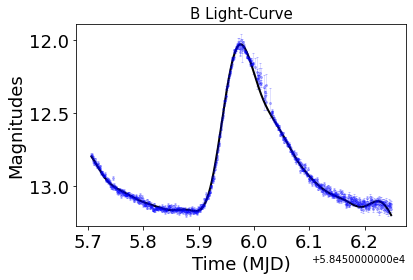

Optimum number of sine waves is 6


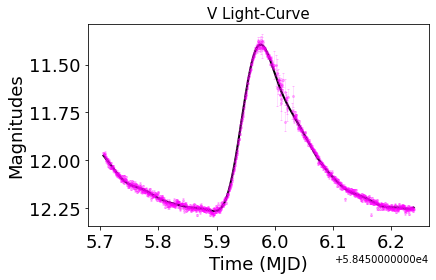

In [2]:
lcs = {}
for file in ['B_LC','V_LC']:
    X  = np.load(f"{choices['datapath']}{file}.npy")
    lc = LC(X[0],X[1],X[2],file,choices)
    lc.fourier_fit()
    lc.plot()
    lcs[file] = lc

### Showcase how sine-waves are added on 1-by-1

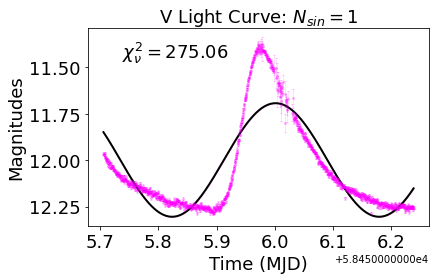

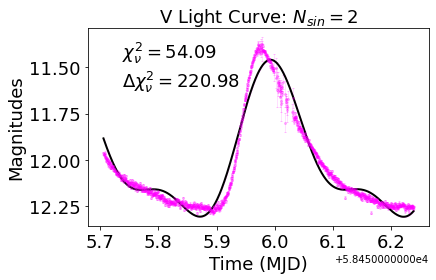

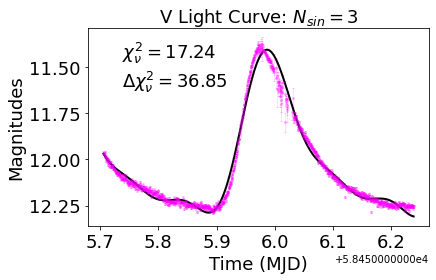

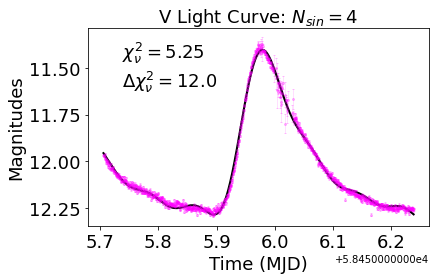

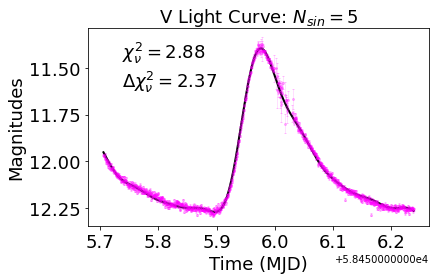

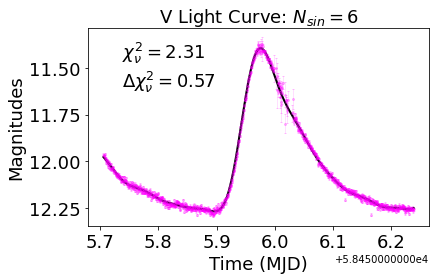

Optimum Nsin=6 found, next dchi2nu = 0.14 


In [3]:
lcV = lcs['V_LC'] ; FS = lcV.choices['FS']
for Nsin in np.arange(1,lcV.Nsin_opt+1,1):
    lcV.fourier_fit(Nsin)
    pl.figure()
    pl.title(r'V Light Curve: $N_{sin}=%s$'%Nsin, fontsize=FS)
    pl.annotate(r'$\chi^2_{\nu}=%s$'%round(lcV.fourier_fits[Nsin]['red_chisq'],2),xy=(0.1,0.85),xycoords='axes fraction',fontsize=FS)
    if Nsin>1:
        pl.annotate(r'$\Delta \chi^2_{\nu}=%s$'%round(lcV.fourier_fits[Nsin-1]['red_chisq']-lcV.fourier_fits[Nsin]['red_chisq'],2),xy=(0.1,0.7),xycoords='axes fraction',fontsize=FS)        
    lcV.plot(create_figure=False)
    
print (f"Optimum Nsin={lcV.Nsin_opt} found, next dchi2nu = {round(lcV.fourier_fits[lcV.Nsin_opt]['red_chisq']-lcV.fourier_fits[lcV.Nsin_opt+1]['red_chisq'],2)} ")

### Get a B-V Fourier series by putting the previous light curves on a common time grid, and subtracting

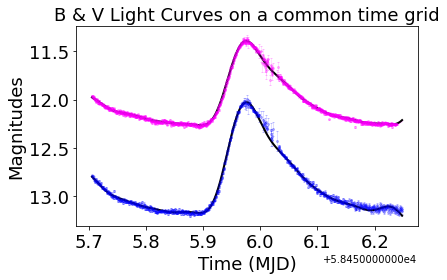

In [4]:
#Get B-V from B and V on a common time grid
B,V,BV = get_lc12_curves(lcs,choices,'BV_LC')

#Plot B and V Curves
pl.figure()
pl.title('B & V Light Curves on a common time grid',fontsize=choices['FS'])
B.plot(show=False,create_figure=False)
V.plot(show=True,create_figure=False)

### Plot the B-V Interpolation

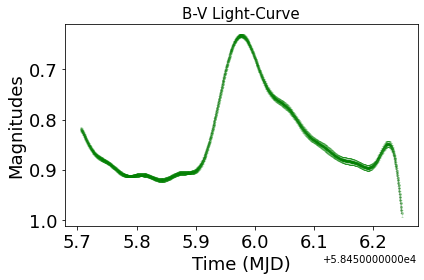

In [5]:
#Plot their difference
BV.plot()

### Compute Temperature using Ballesteros (2012) relation, and plot

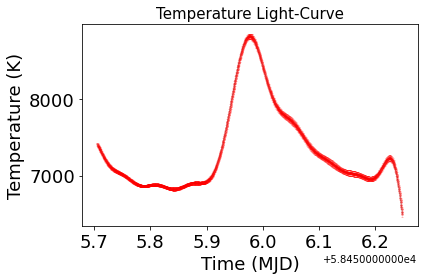

In [6]:
#Get Temperature from B-V (using Reddening meta data to get intrinsic B-V)
T = get_Temperature(BV,choices)

#Plot Temperature Curve
T.plot(invert=False, ylab='Temperature (K)')